In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json

from models.blaze_face_detector import FaceDetector
from models.mediapipe_image_embedding import EmbeddingModel
from models.multi_stage_face_model import BundleModel
from models.googlenet_age import AgeModel
from models.googlenet_gender import GenderModel

from utils.cv_utils import cv_rectangle

In [2]:
IMAGE_PATH = 'data/cover-76.jpg'

img = Image.open(IMAGE_PATH)      # RGB Image.Image
img_cv = cv2.imread(IMAGE_PATH)   # BGR numpy array

In [3]:
detector = FaceDetector('weights/blaze_face_short_range.tflite',
                        min_detection_confidence=0.6,
                        min_suppression_threshold=0.4)
embedder = EmbeddingModel('weights/mobilenet_v3_small.tflite')
age_model = AgeModel('weights/age_googlenet.onnx')
gender_model = GenderModel('weights/gender_googlenet.onnx')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
bundle = BundleModel(detector)
bundle.add(name='embedding', model=embedder)
bundle.add(name='age', model=age_model)
bundle.add(name='gender', model=gender_model)

Models: {'embedding': MediaPipe Embedding: https://developers.google.com/mediapipe/solutions/vision/image_embedder, 'age': ONNX googlenet age: https://github.com/onnx/models/tree/main/vision/body_analysis/age_gender, 'gender': ONNX googlenet gender: https://github.com/onnx/models/tree/main/vision/body_analysis/age_gender}

Detected faces: 2
---
index 0
coord {'x': 597, 'y': 61, 'w': 252, 'h': 252}
embedding [0.16804552 0.50038183 0.16250579 ... 0.94123679 0.00985938 0.45734751]
age (25-32)
gender Male


/opt/homebrew/Caskroom/miniforge/base/envs/py311/lib/python3.11/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


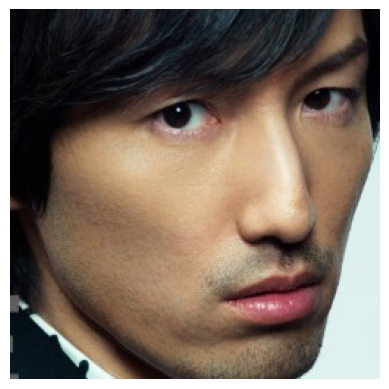

index 1
coord {'x': 27, 'y': 269, 'w': 266, 'h': 266}
embedding [-0.35384765  0.08180638 -0.31875676 ...  0.51105803  0.0534878
 -0.24370681]
age (25-32)
gender Female


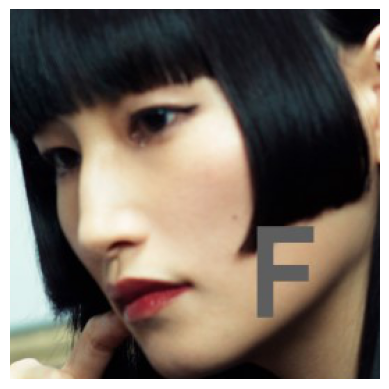

In [5]:
faces = bundle(img)

print(f"Detected faces: {len(faces)}")
print('---')

for face in faces:
    vect = face['embedding']
    
    for k, v in face.items():
        if k != bundle.face_detector._image_key:
            print(k, v)
    
    plt.imshow(face[bundle.face_detector._image_key])
    plt.axis('off')
    plt.show()